In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import measureOC
import ClarkePark_OC

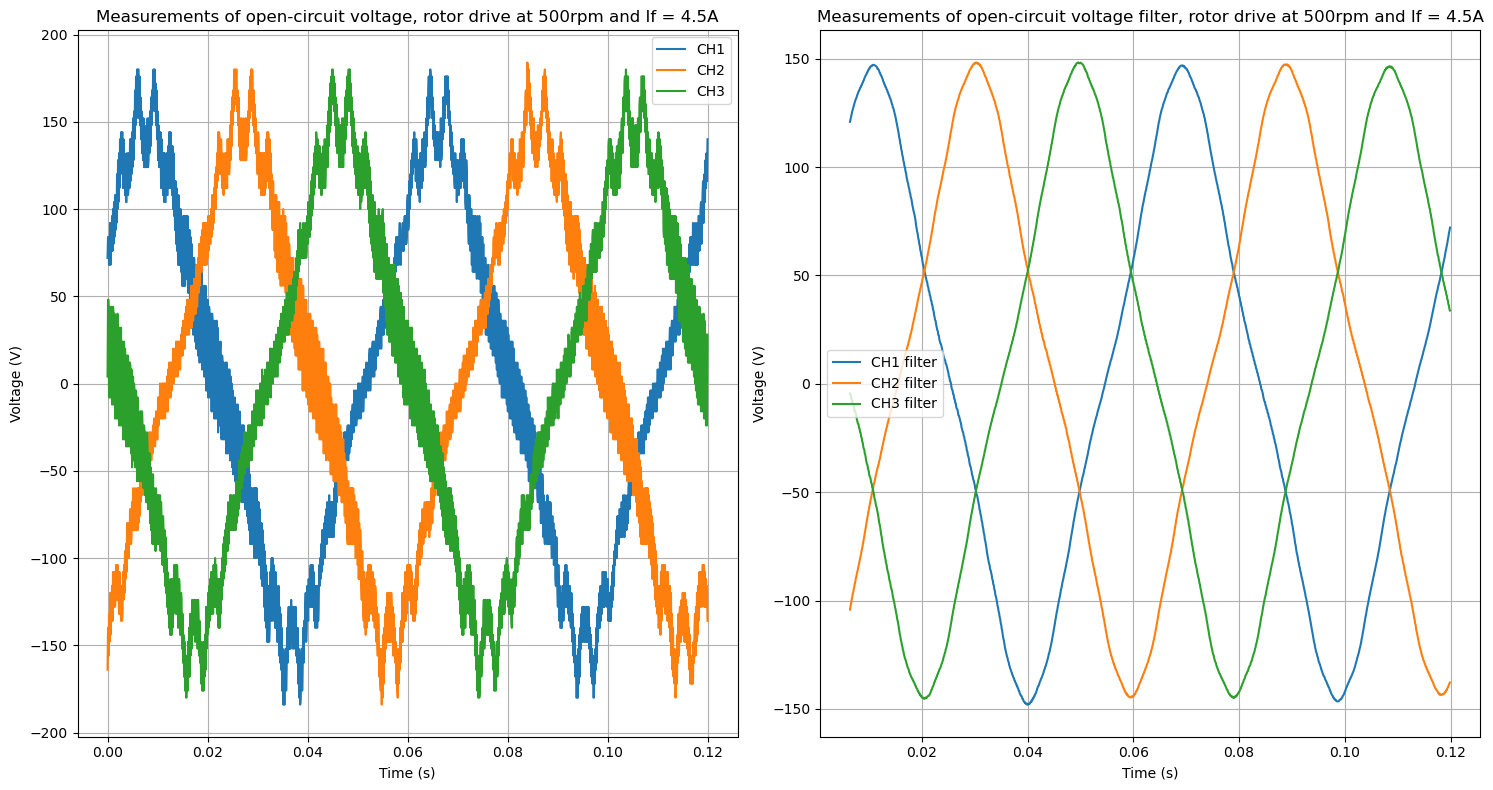

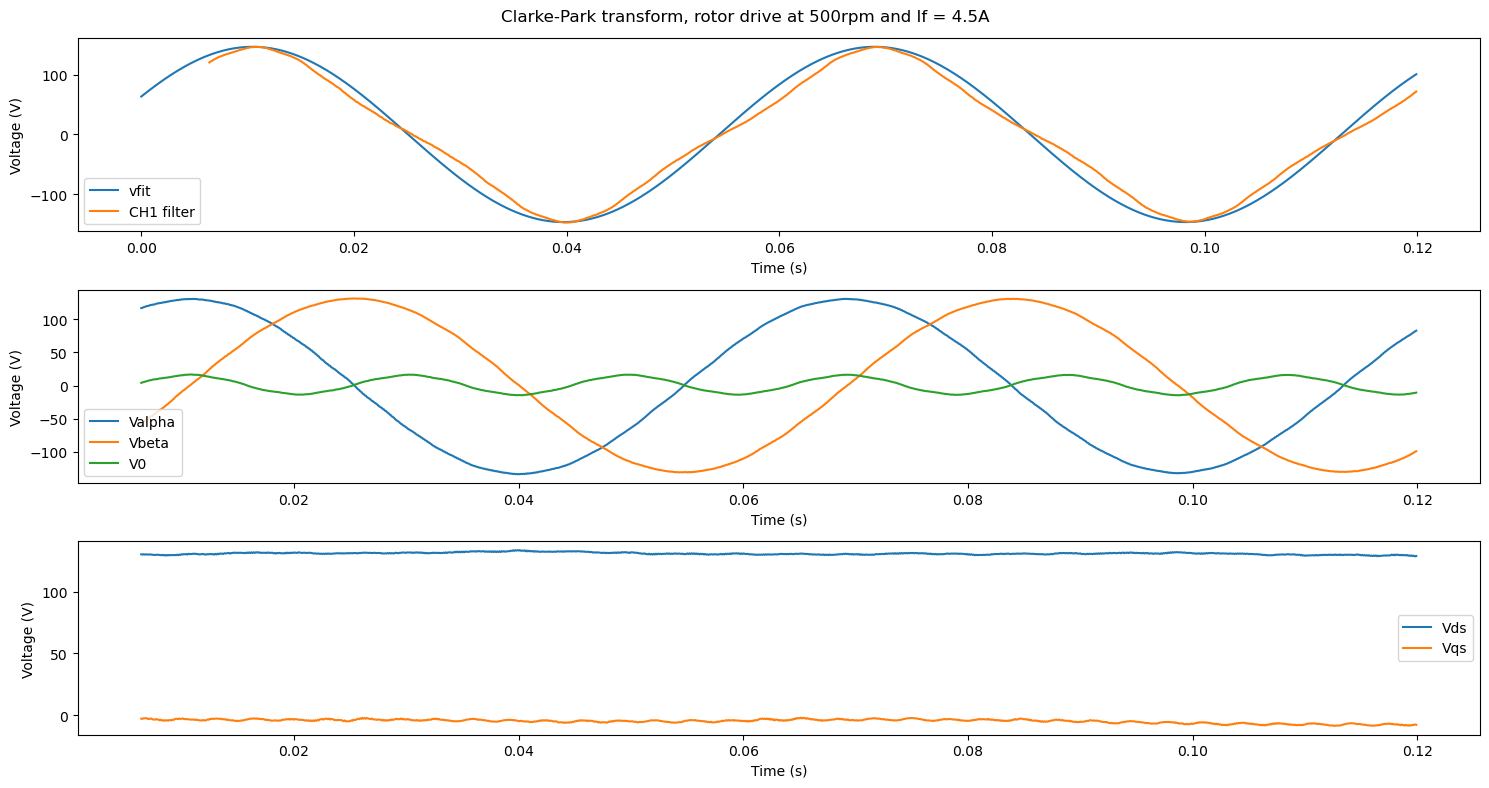

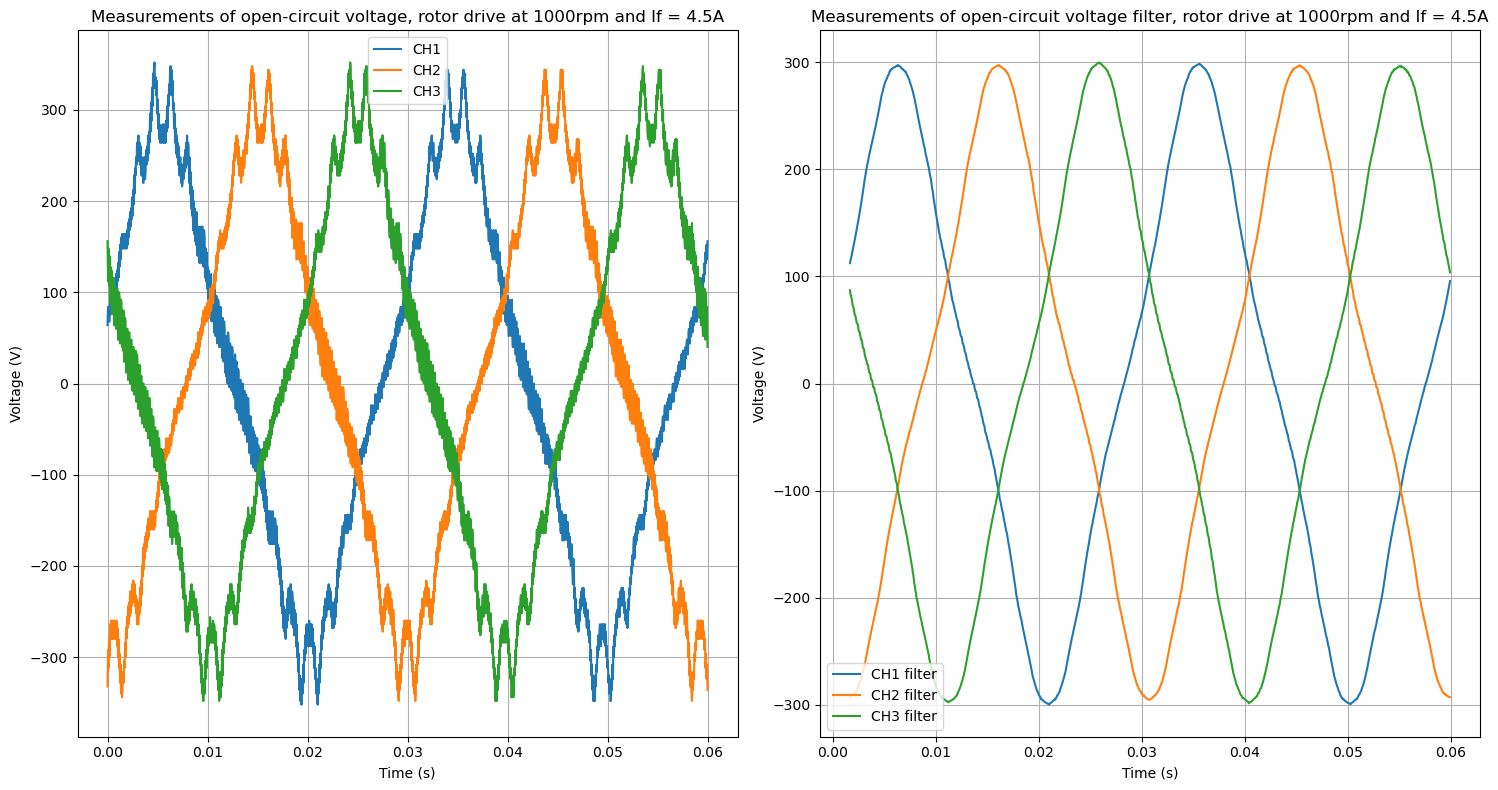

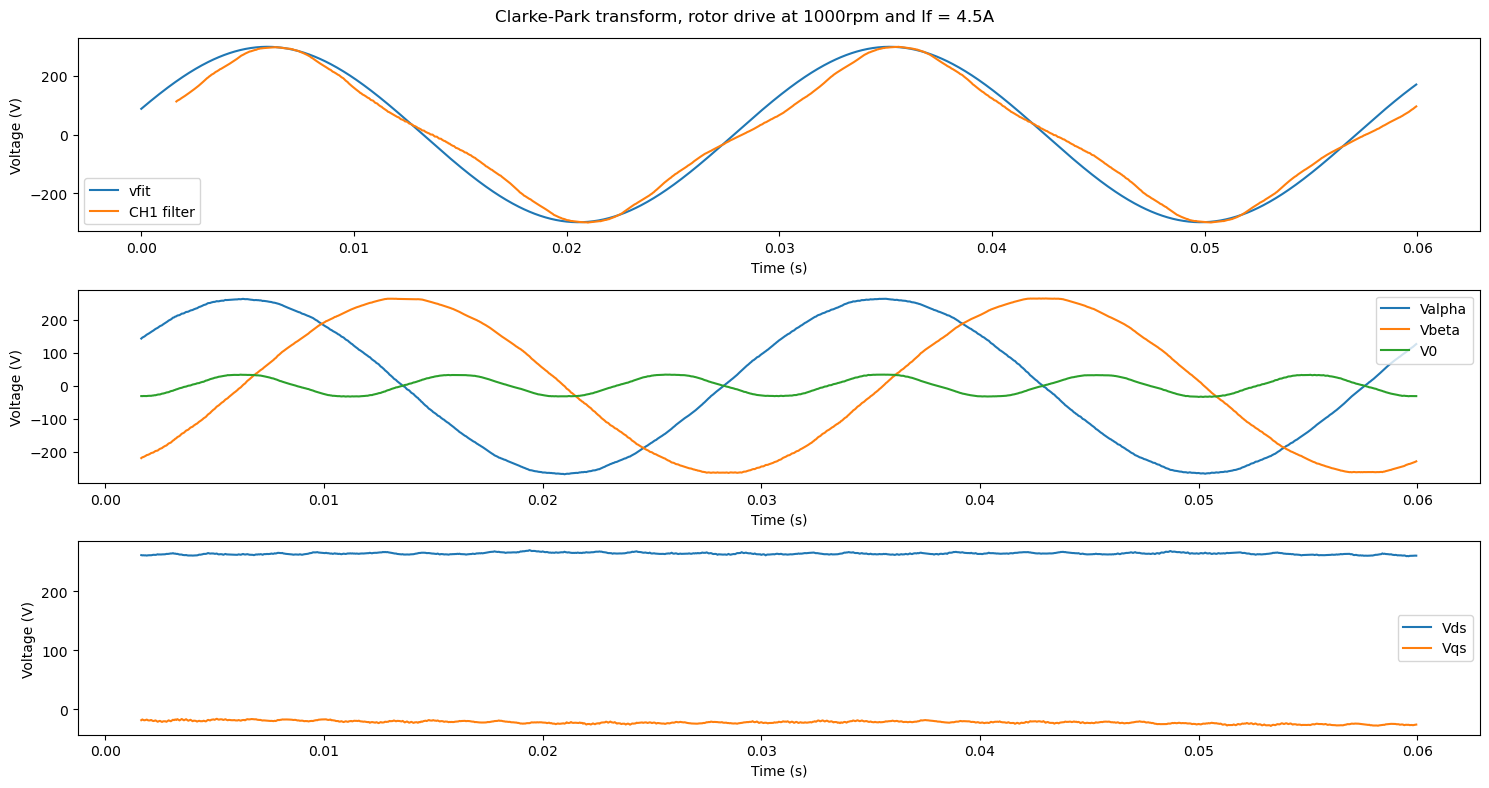

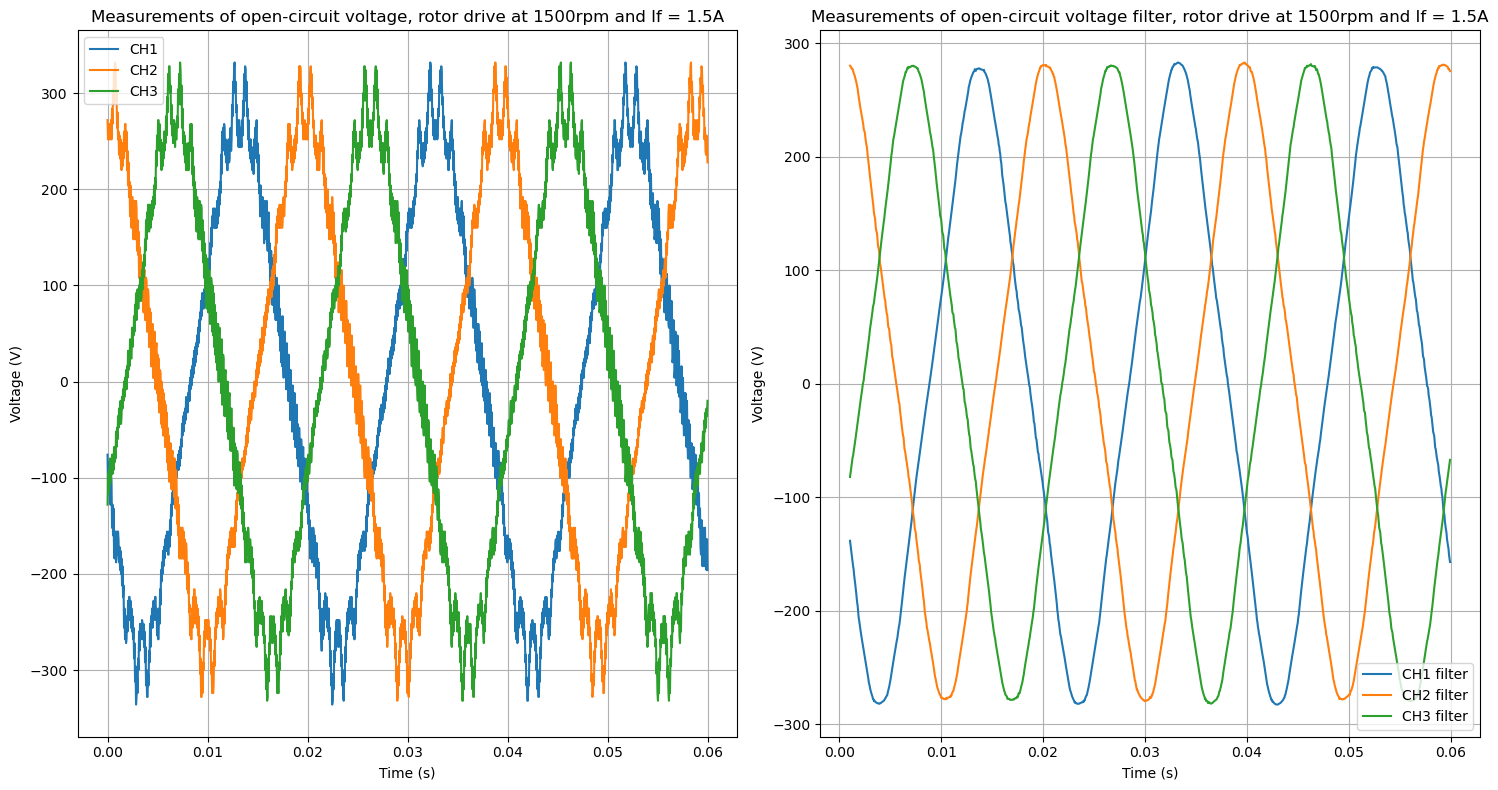

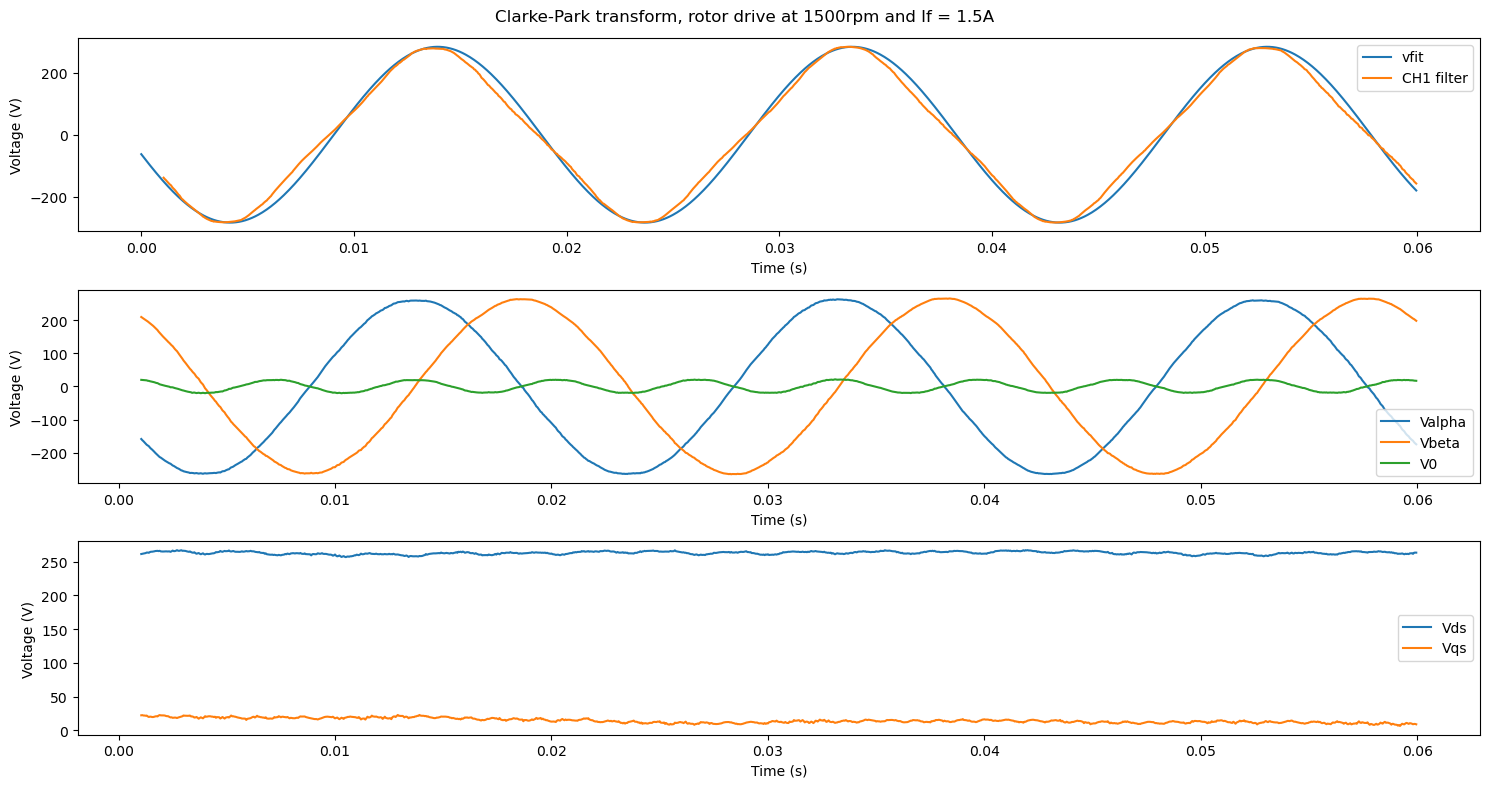

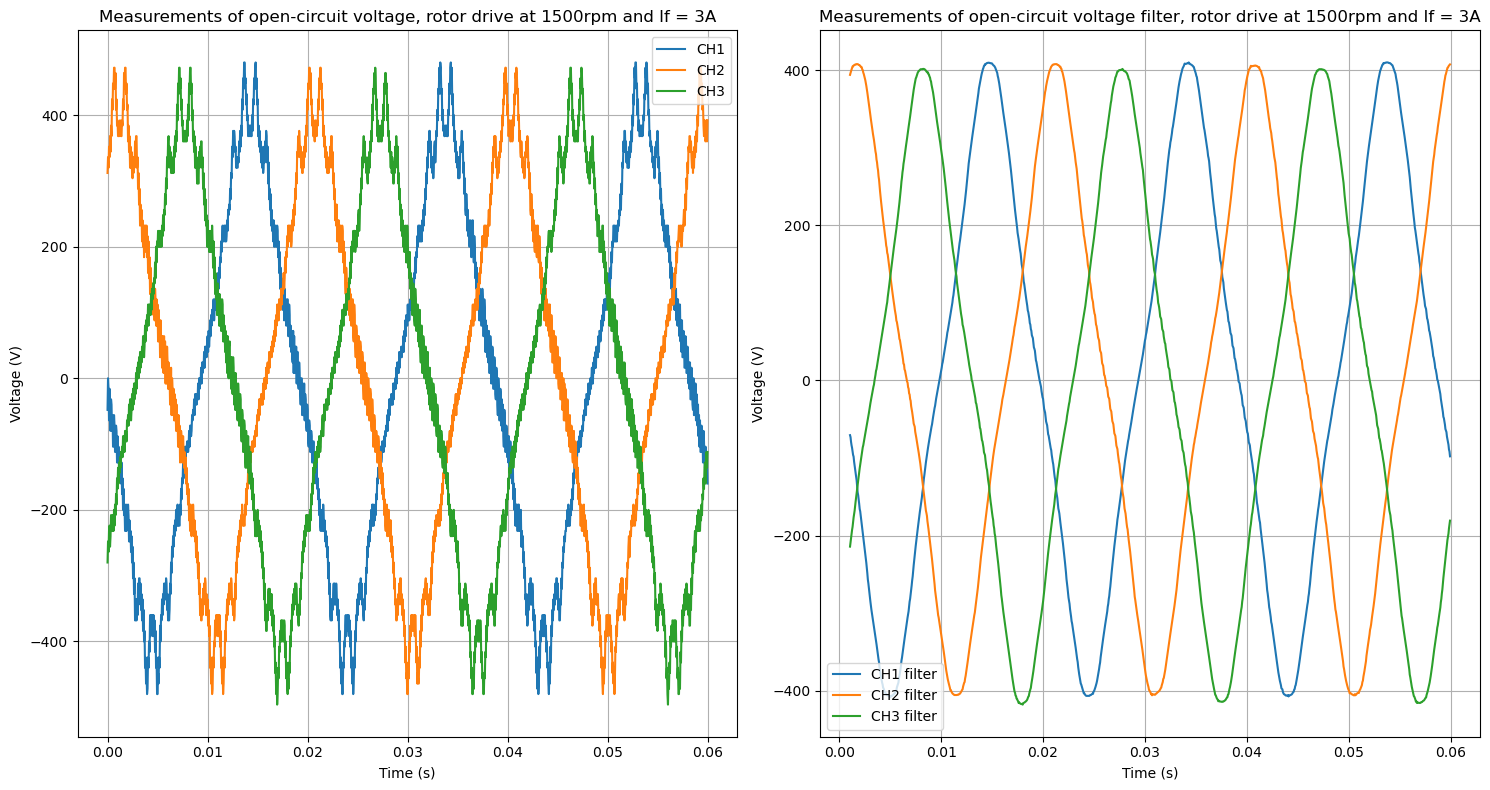

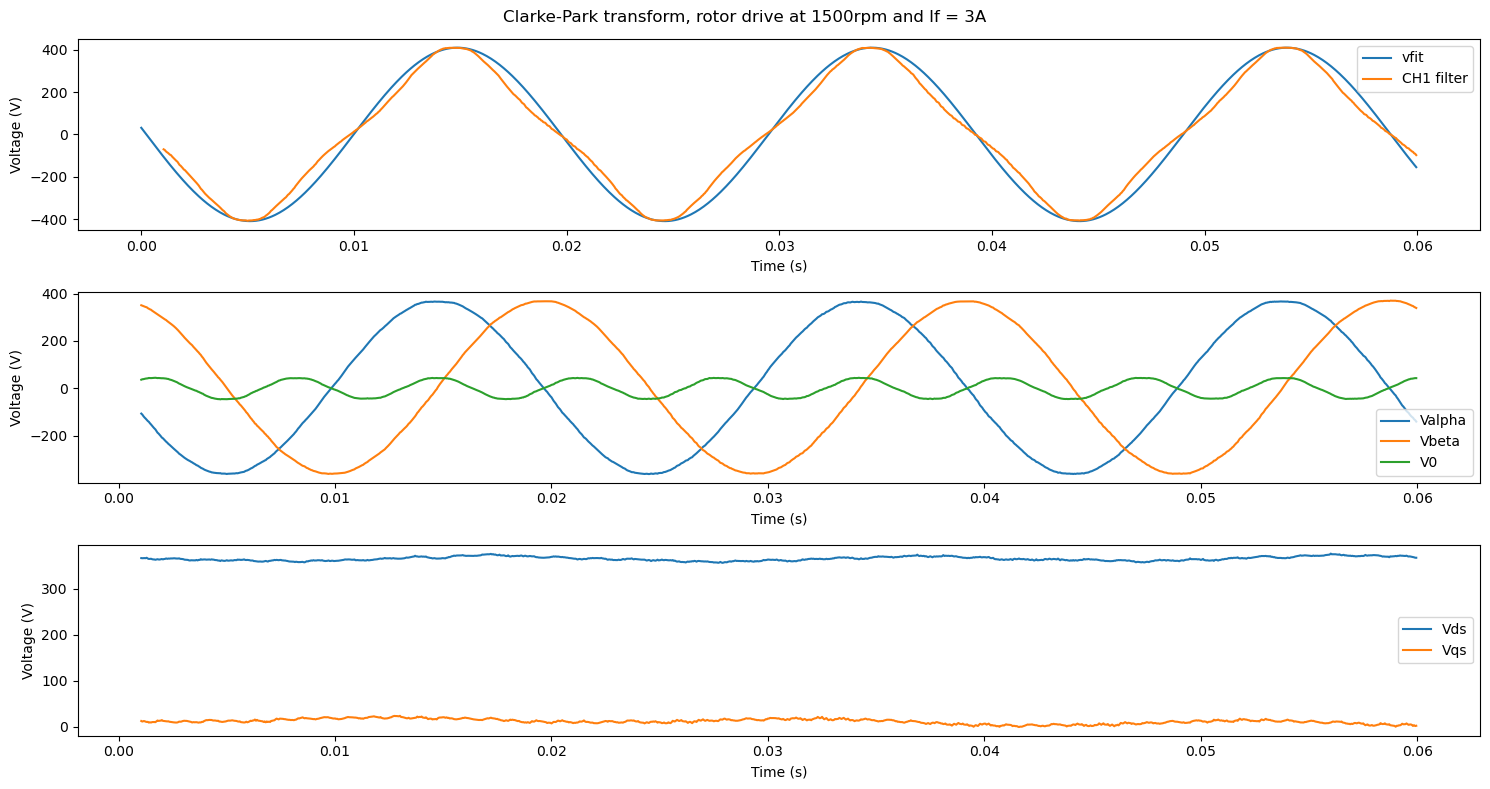

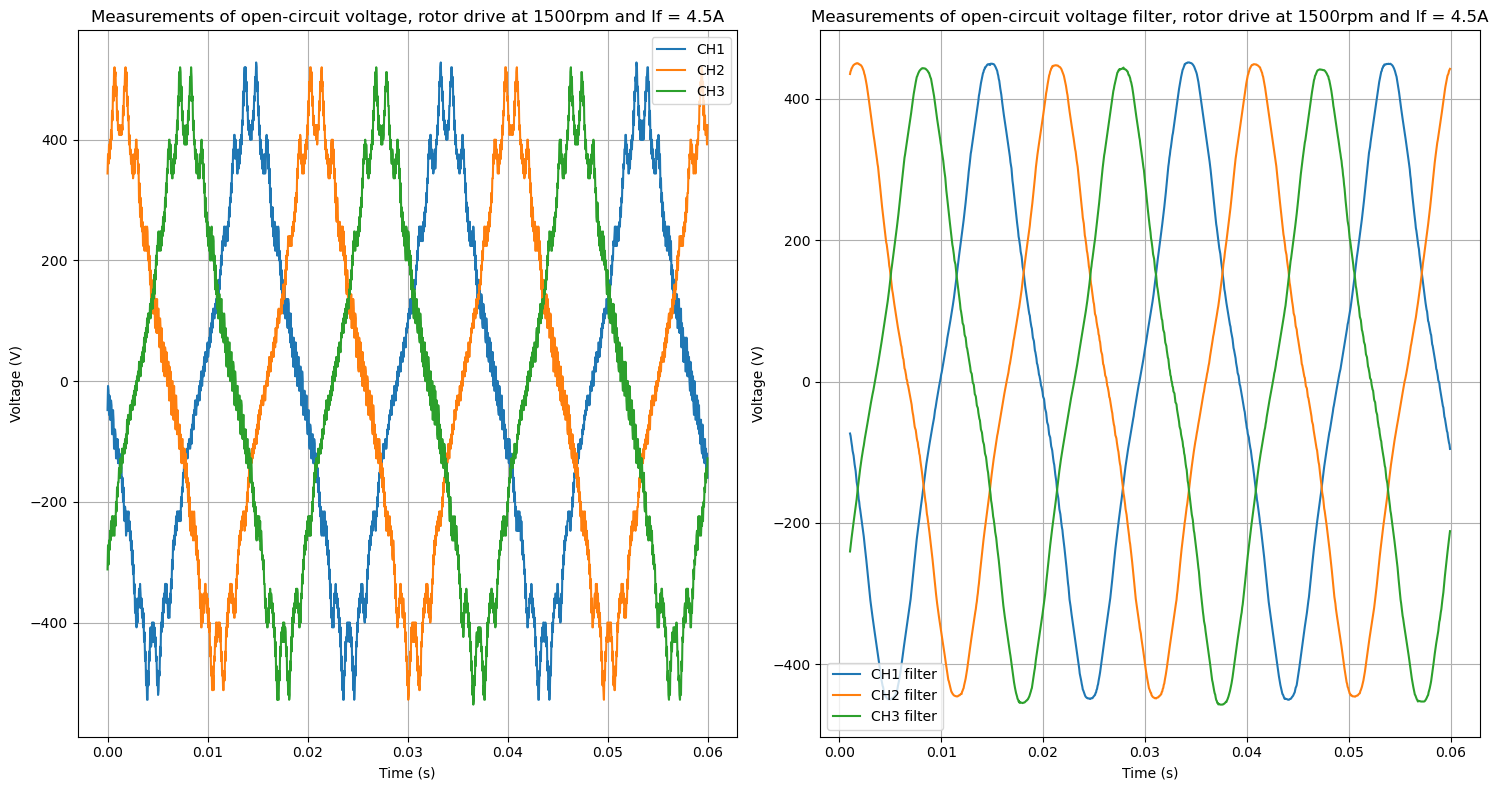

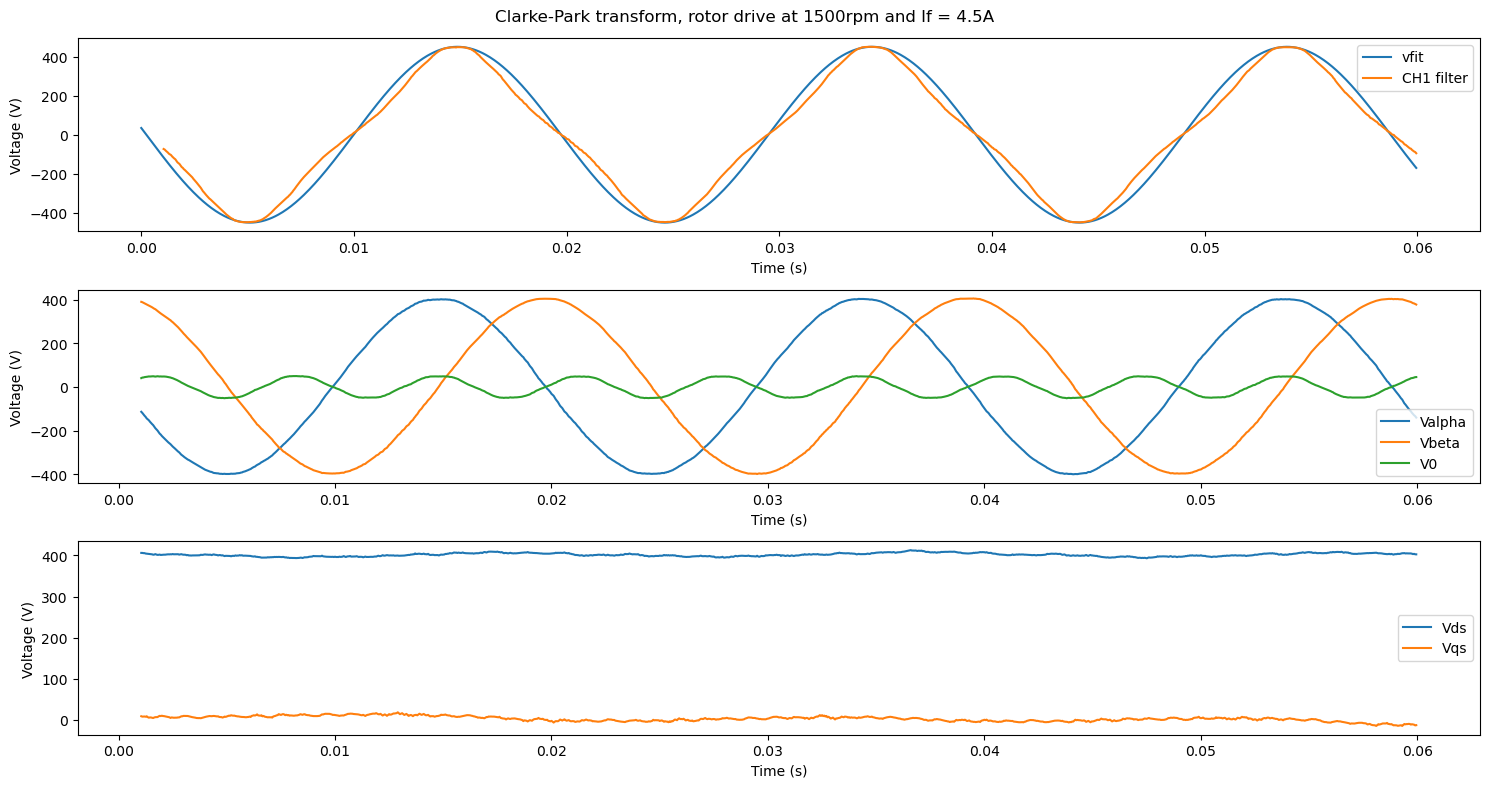

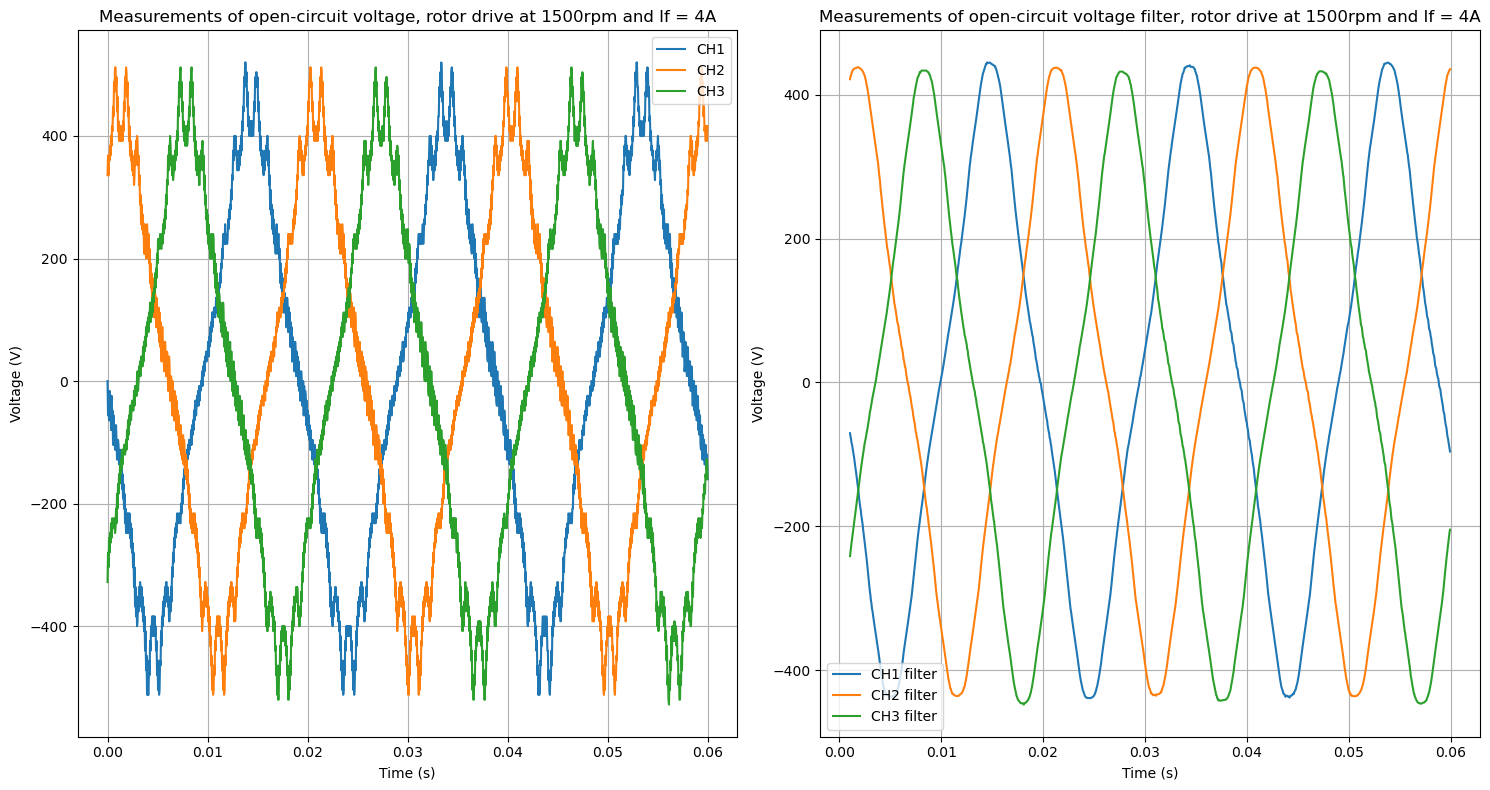

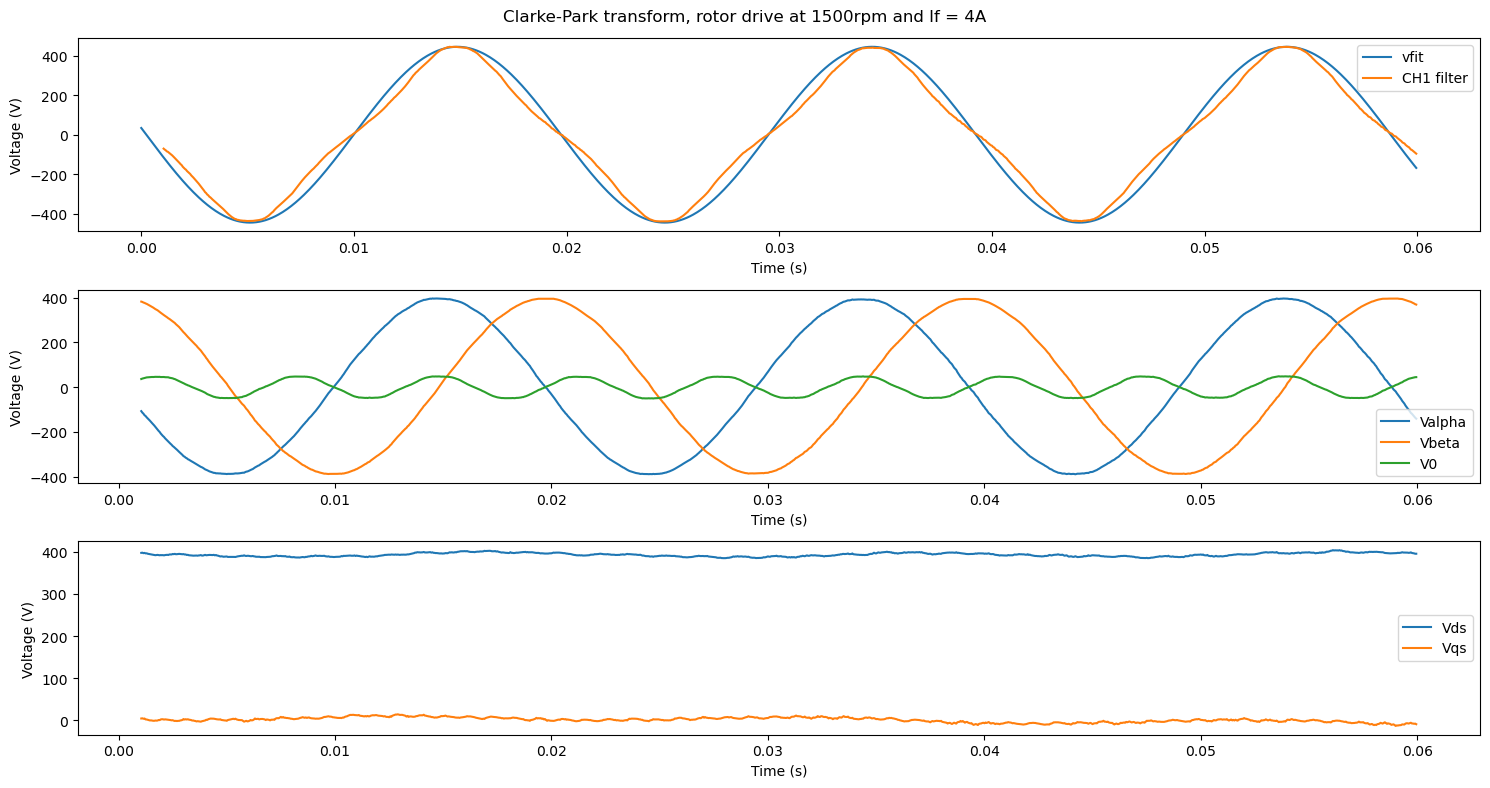

In [2]:
#create a pandas dataframe with RPM, If, v1, v2, v3
df = pd.DataFrame(columns=['RPM', 'If', 'v1', 'v2', 'v3', 'vds', 'vqs'])

#add data to the dataframe
v1, v2, v3 = measureOC.computeOC("Data/pn_4_5A_500.csv", 500, 4.5, 65)
vds, vqs = ClarkePark_OC.clarkePark('Data/pn_4_5A_500.csv', 500, 4.5, 65, (50*2*math.pi + 8)/3, -math.pi/6-0.6)
df = pd.concat([df,pd.DataFrame({'RPM': 500, 'If': 4.5, 'v1': v1, 'v2': v2, 'v3': v3, 'vds': vds, 'vqs':vqs, 'omega_fit': (50*2*math.pi + 8)/3}, index=[0])], ignore_index=True)

v1, v2, v3 = measureOC.computeOC("Data/pn_4_5A_1000.csv", 1000, 4.5, 34)
vds, vqs = ClarkePark_OC.clarkePark('Data/pn_4_5A_1000.csv', 1000, 4.5, 34, 2*(50*2*math.pi + 8)/3, -math.pi/6-0.75)
df = pd.concat([df,pd.DataFrame({'RPM': 1000, 'If': 4.5, 'v1': v1, 'v2': v2, 'v3': v3, 'vds': vds, 'vqs':vqs, 'omega_fit': 2*(50*2*math.pi + 8)/3}, index=[0])], ignore_index=True)

v1, v2, v3 = measureOC.computeOC("Data/pn_1_5A_1500.csv", 1500, 1.5, 22)
vds, vqs = ClarkePark_OC.clarkePark('Data/pn_1_5A_1500.csv', 1500, 1.5, 22, (50*2*math.pi + 8), 2*math.pi/3-0.3)
df = pd.concat([df,pd.DataFrame({'RPM': 1500, 'If': 1.5, 'v1': v1, 'v2': v2, 'v3': v3, 'vds': vds, 'vqs':vqs, 'omega_fit': (50*2*math.pi + 8)}, index=[0])], ignore_index=True)

v1, v2, v3 = measureOC.computeOC("Data/pn_3A_1500.csv", 1500, 3, 22)
vds, vqs = ClarkePark_OC.clarkePark('Data/pn_3A_1500.csv', 1500, 3, 22, (50*2*math.pi + 8), 2*math.pi/3 - 0.6)
df = pd.concat([df,pd.DataFrame({'RPM': 1500, 'If': 3, 'v1': v1, 'v2': v2, 'v3': v3, 'vds': vds, 'vqs':vqs, 'omega_fit': (50*2*math.pi + 8)}, index=[0])], ignore_index=True)

v1, v2, v3 = measureOC.computeOC("Data/pn_4_5A_1500.csv", 1500, 4.5, 22)
vds, vqs = ClarkePark_OC.clarkePark('Data/pn_4_5A_1500.csv', 1500, 4.5, 22, (50*2*math.pi + 8), 2*math.pi/3 - 0.6)
df = pd.concat([df,pd.DataFrame({'RPM': 1500, 'If': 4.5, 'v1': v1, 'v2': v2, 'v3': v3, 'vds': vds, 'vqs':vqs, 'omega_fit': (50*2*math.pi + 8)}, index=[0])], ignore_index=True)

v1, v2, v3 = measureOC.computeOC("Data/pn_4A_1500.csv", 1500, 4, 22)
vds, vqs = ClarkePark_OC.clarkePark('Data/pn_4A_1500.csv', 1500, 4, 22, (50*2*math.pi + 8), 2*math.pi/3 - 0.6)
df = pd.concat([df,pd.DataFrame({'RPM': 1500, 'If': 4, 'v1': v1, 'v2': v2, 'v3': v3, 'vds': vds, 'vqs':vqs, 'omega_fit': (50*2*math.pi + 8)}, index=[0])], ignore_index=True)



,RPM,If,v1,v2,v3,vds,vqs,omega_fit,vmean
0,500,4.5,104.042604,104.782346,104.825861,130.778210,-4.814572,107.386422,104.550270
1,1000,4.5,210.967388,210.218687,211.882467,263.814594,-22.549155,214.772844,211.022847
2,1500,1.5,200.046937,200.175502,199.146983,263.014944,14.627642,322.159265,199.789807
3,1500,3.0,289.785215,288.242437,283.871231,365.467254,11.599718,322.159265,287.299628
4,1500,4.5,319.355135,318.583746,314.212541,401.800525,2.995987,322.159265,317.383807
5,1500,4.0,314.726800,310.098465,306.755778,393.224873,1.165933,322.159265,310.527014


Text(0.5, 1.0, 'Vmean vs If for RPM=1500')

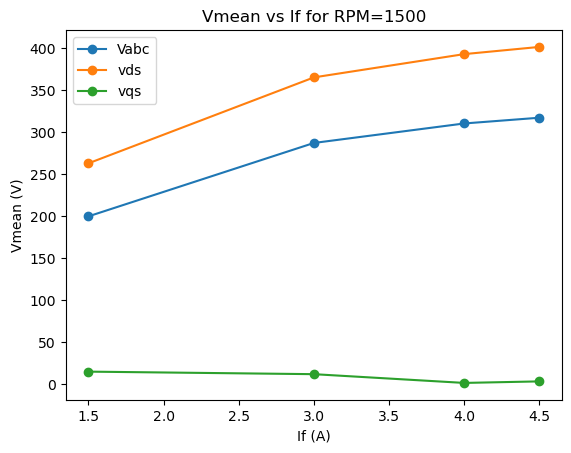

In [3]:
#compute vmean of each row of df
df['vmean'] = df[['v1', 'v2', 'v3']].mean(axis=1)

display(df)

#plot vmean vs If for RPM=1500
df_1500 = df[df['RPM'] == 1500]
#rank from smallest to largest If
df_1500 = df_1500.sort_values(by=['If'])
plt.plot(df_1500['If'], df_1500['vmean'], '-o')
plt.plot(df_1500['If'], df_1500['vds'], '-o')
plt.plot(df_1500['If'], df_1500['vqs'], '-o')
plt.xlabel('If (A)')
plt.ylabel('Vmean (V)')
plt.legend(['Vabc', 'vds', 'vqs'])
plt.title('Vmean vs If for RPM=1500')


,RPM,If,v1,v2,v3,vds,vqs,omega_fit,vmean,psi_ds,psi_qs
0,500,4.5,104.042604,104.782346,104.825861,130.778210,-4.814572,107.386422,104.550270,0.044834,1.217828
1,1000,4.5,210.967388,210.218687,211.882467,263.814594,-22.549155,214.772844,211.022847,0.104991,1.228342
2,1500,1.5,200.046937,200.175502,199.146983,263.014944,14.627642,322.159265,199.789807,-0.045405,0.816413
3,1500,3.0,289.785215,288.242437,283.871231,365.467254,11.599718,322.159265,287.299628,-0.036006,1.134430
4,1500,4.5,319.355135,318.583746,314.212541,401.800525,2.995987,322.159265,317.383807,-0.009300,1.247211
5,1500,4.0,314.726800,310.098465,306.755778,393.224873,1.165933,322.159265,310.527014,-0.003619,1.220592


Text(0.5, 1.0, '$\\psi$ vs If for RPM=1500')

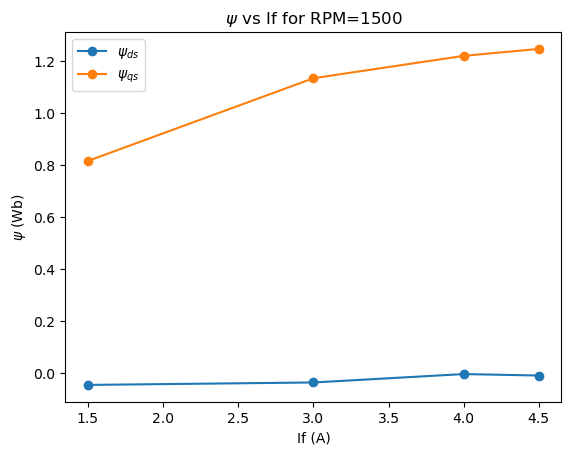

In [15]:
#we can compute psi from vds and vqs and rpm
#Uds = R*Ids + Ld*dIds/dt + omega*psi_ds = omega*psi_ds (steady state)
#Uqs = R*Iqs + Lq*dIqs/dt + omega*psi_qs = omega*psi_qs (steady state)

df['psi_ds'] = -df['vqs']/df['omega_fit']
df['psi_qs'] = df['vds']/df['omega_fit']

display(df)

df_1500 = df[df['RPM'] == 1500]
#rank from smallest to largest If
df_1500 = df_1500.sort_values(by=['If'])
#plot psi_ds and psi_qs vs If for RPM=1500
plt.plot(df_1500['If'], df_1500['psi_ds'], '-o')    
plt.plot(df_1500['If'], df_1500['psi_qs'], '-o')
plt.xlabel('If (A)')
plt.ylabel(r'$\psi$ (Wb)')
plt.legend([r'$\psi_{ds}$', r'$\psi_{qs}$'])
plt.title(r'$\psi$ vs If for RPM=1500')

In [13]:
#export df round to 2 to csv
export = df.round(2)
#remove omega_fit and vmean column
export = export.drop(columns=['omega_fit', 'vmean'])
export.to_csv('Data/OC.csv', index=False)